In [9]:
import pandas as pd

In [10]:
house_info_url = 'https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_estate.csv'

In [11]:
df = pd.read_csv(house_info_url)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
df.drop('No', axis=1, inplace=True)

In [13]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1:]

In [15]:
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [16]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [17]:
X.shape

(414, 5)

In [18]:
X_train = X.iloc[:350, :]
y_train = y.iloc[:350, :]

X_test = X.iloc[350:, :]
y_test = y.iloc[350:, :]

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
mdl = LinearRegression()
mdl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
c = mdl.intercept_
c

array([-5491.46109274])

In [22]:
m = mdl.coef_
m

array([[-2.78758171e-01, -3.98964697e-03,  1.15190896e+00,
         2.69185622e+02, -9.76930419e+00]])

In [23]:
coeff_df = pd.DataFrame({'Col' : X_train.columns,
                         'Coeff' : mdl.coef_.flatten()})

coeff_df

,Col,Coeff
0,X2 house age,-0.278758
1,X3 distance to the nearest MRT station,-0.003990
2,X4 number of convenience stores,1.151909
3,X5 latitude,269.185622
4,X6 longitude,-9.769304


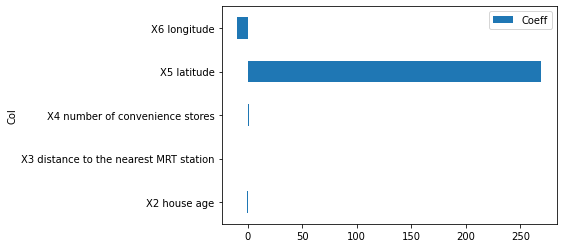

In [24]:
coeff_df.set_index('Col').plot.barh()

In [25]:
test_val = X_test.iloc[0, :]
test_val.shape

(5,)

In [26]:
import numpy as np

In [27]:
test_pred = c + np.dot(m, test_val)

test_pred

array([41.57891599])

In [28]:
y_test.iloc[0]

Y house price of unit area    42.3
Name: 350, dtype: float64

In [29]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


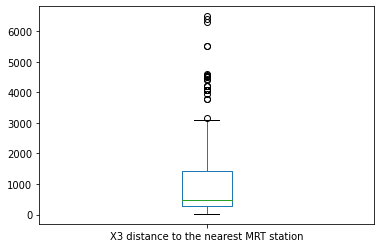

In [30]:
X_train.iloc[:, 1].plot.box()

In [31]:
y_learnt = mdl.predict(X_train)
y_learnt[:5]

array([[48.49454152],
       [49.23902316],
       [47.21438951],
       [47.21438951],
       [48.04852356]])

In [34]:
y_train[:5]

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [36]:
learntdf = pd.DataFrame({'Actual':y_train.iloc[:,0],'Learnt':y_learnt.flatten()})
learntdf.head()

,Actual,Learnt
0,37.9,48.494542
1,42.2,49.239023
2,47.3,47.214390
3,54.8,47.214390
4,43.1,48.048524


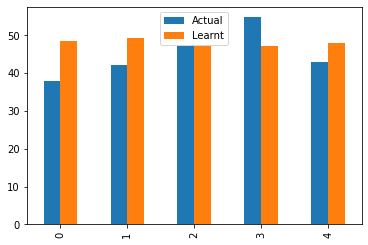

In [38]:
learntdf.head().plot(kind='bar')

In [40]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
ylearn_mse = mse(y_train,y_learnt)
ylearn_mse

81.75629086728215

In [44]:
import numpy as np

In [46]:
ylearn_rmse = np.sqrt(ylearn_mse)
ylearn_rmse

9.041918539075771

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2score_learn = r2_score(y_train,y_learnt)
r2score_learn

0.5678559054812102

In [49]:
y_pred = mdl.predict(X_test)
y_pred[:5]

array([[41.57891599],
       [34.83479178],
       [28.40015087],
       [34.86655446],
       [30.15041866]])

In [50]:
ypred_df = pd.DataFrame({'Actual': y_test.iloc[:,0],'pred': y_pred.flatten()})
ypred_df.head()

,Actual,pred
350,42.3,41.578916
351,28.6,34.834792
352,25.7,28.400151
353,31.3,34.866554
354,30.1,30.150419


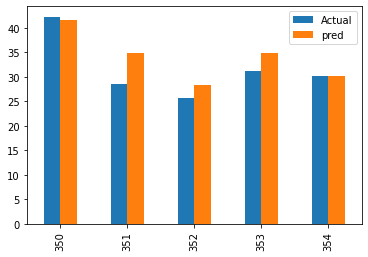

In [51]:
ypred_df.head().plot(kind='bar')

In [52]:
ypred_mse = mse(y_test,y_pred)
ypred_mse

66.06479597348644

In [53]:
ypred_rmse = np.sqrt(ypred_mse)
ypred_rmse

8.12802534281768

In [54]:
r2score_pred = r2_score(y_test,y_pred)
r2score_pred

0.5860355994573447

In [55]:
n= X_test.shape[0]
k= X_test.shape[1]
n,k

(64, 5)

In [57]:
adj_r2 = 1-(((1-r2score_pred)*(n-1))/(n-k-1))
adj_r2

0.5503490132036676